# Preprocess population Datase
1. Find that population positively correlated with the number of the properties in the region.
2. Find the proportion of properties between the intersection of each SA2 and suburb and its SA2.
3. Find the population of every suburb according to the proportion of intersection and the population of SA2.
4. Find the density of population for every suburb.

In [1]:
import pandas as pd
import seaborn as sns
import geopandas as gdp
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import geopandas as gpd

/opt/anaconda3/envs/ads/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


The Scatter Plot of Population and Preperty Count

In [2]:
# Read the data
property1 = pd.read_csv("../data/raw/properties_preporcessed_1.csv", index_col=[0])[['name', 'SA2_MAIN16']]
population_sa2 = pd.read_csv("../data/raw/external_data/population.csv", index_col=[0])
population_sa2 = population_sa2[['SA2 code', 'SA2 name', 'ERP 2021','density 2021 persons/km2']]
# Count the number of properties per SA2
property_agg = property1.groupby('SA2_MAIN16', as_index=False).count().rename(columns={'SA2_MAIN16' : 'SA2 code', 'name' : 'property_count'})

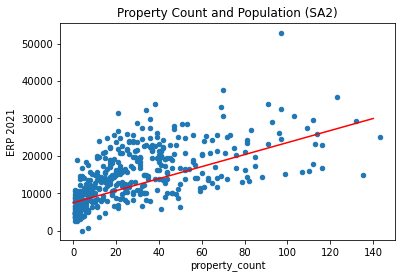

In [3]:
# Merge the number of population and properties for SA2
pop_count = pd.merge(property_agg, population_sa2, on='SA2 code', how='left')

# Draw The Scatter Plot of Population and Preperty Count
pop_count = pop_count[(np.abs(stats.zscore(pop_count['property_count'])) <2.5)]
pop_count = pop_count[(np.abs(stats.zscore(pop_count['ERP 2021'])) < 5)]
ax3 = pop_count.plot(kind='scatter', title='Property Count and Population (SA2)', y='ERP 2021', x='property_count')
ax3.add_line(line=plt.Line2D(xdata=[0, 140], ydata=[7500, 30000], color='red'))
ax3.get_figure().savefig("../plots/population_property_scatter.jpeg")

The ratio of properties between the intersection and its SA2.

In [4]:
# Read the properties data and the population data for SA2
population = pd.read_csv('../data/raw/external_data/population.csv')
properties_preporcessed_1 = pd.read_csv('../data/raw/properties_preporcessed_1.csv')

In [5]:
# The population data
population=population.iloc[:,1:]
population.head(10)

,S/T code,S/T name,GCCSA code,GCCSA name,SA4 code,SA4 name,SA3 code,SA3 name,SA2 code,SA2 name,ERP 2020,ERP 2021,ERP Change Amount,ERP Change Rate,Natureal increase,Internal migration,Overseas migration,Area km2,density 2021 persons/km2
0,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011001,Alfredton,15030,16263,1233,8.2,117,1143,-27,52.7,308.5
1,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011002,Ballarat,12097,11931,-166,-1.4,-43,-107,-16,12.4,963.8
2,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011003,Ballarat - North,24606,24720,114,0.5,8,123,-17,92.4,267.7
3,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011004,Ballarat - South,25639,25543,-96,-0.4,83,-150,-29,32.9,777.5
4,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011005,Buninyong,7721,7668,-53,-0.7,33,-78,-8,51.6,148.6
5,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011006,Delacombe,9234,10007,773,8.4,82,699,-8,34.2,292.9
6,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011007,Smythes Creek,4113,4167,54,1.3,20,34,0,104.7,39.8
7,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011008,Wendouree - Miners Rest,15170,15216,46,0.3,14,47,-15,67.6,225.2
8,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20102,Creswick - Daylesford - Ballan,201021009,Bacchus Marsh Region,6309,6338,29,0.5,20,11,-2,1038.8,6.1
9,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20102,Creswick - Daylesford - Ballan,201021010,Creswick - Clunes,8131,8189,58,0.7,6,55,-3,856.8,9.6


In [6]:
# the properties data
properties_preporcessed_1=properties_preporcessed_1.iloc[:,1:]
properties_preporcessed_1.head(10)

,name,cost_text,rooms,type,cloest station,station_distance,cloest school,school_distance,CBD_distance,postcode,...,text,beds,bath,parking,Longitude,Latitude,SA2_CODE21,LOC_PID,LOC_NAME,SA2_MAIN16
0,1901/368 St Kilda Road Melbourne VIC 3000,$1800 Per Week,"['3 Beds', '2 Baths', '2 Parking']",Apartment / Unit / Flat,30,1803.65,1374,667.06,1702.19,3000,...,Per Week,3,2,2,144.971027,-37.831809,206051512.0,loc9901d119afda,Melbourne,206051132.0
1,1211/200 Spencer Street Melbourne VIC 3000,$480 per week,"['1 Bed', '1 Bath', '1 Parking']",Apartment / Unit / Flat,176,371.68,2265,352.49,2267.13,3000,...,per week,1,1,1,144.953247,-37.816228,206041505.0,loc9901d119afda,Melbourne,206041122.0
2,1008/380 Little Lonsdale Street Melbourne VIC ...,$400 pw,"['1 Bed', '1 Bath']",Apartment / Unit / Flat,28,248.50,2189,401.73,1937.39,3000,...,pw,1,1,0,144.958129,-37.812103,206041505.0,loc9901d119afda,Melbourne,206041122.0
3,3/27 Flinders Lane Melbourne VIC 3000,$420 per week,"['1 Bed', '1 Bath']",Apartment / Unit / Flat,140,404.26,2193,586.61,790.13,3000,...,per week,1,1,0,144.973365,-37.814732,206041503.0,loc9901d119afda,Melbourne,206041122.0
4,611/408 Lonsdale Street Melbourne VIC 3000,$350,"['1 Bed', '1 Bath']",Apartment / Unit / Flat,28,525.08,2265,779.91,1657.95,3000,...,NaN,1,1,0,144.960401,-37.812598,206041504.0,loc9901d119afda,Melbourne,206041122.0
5,102/9 Bligh Place Melbourne VIC 3000,$600,"['2 Beds', '1 Bath', '1 Parking']",Apartment / Unit / Flat,30,471.84,2265,934.78,1554.98,3000,...,NaN,2,1,1,144.963710,-37.817317,206041505.0,loc9901d119afda,Melbourne,206041122.0
6,1715/220 Spencer Street Melbourne VIC 3000,$600,"['2 Beds', '2 Baths', '1 Parking']",Apartment / Unit / Flat,176,433.14,2189,485.04,2329.51,3000,...,NaN,2,2,1,144.952956,-37.815716,206041505.0,loc9901d119afda,Melbourne,206041122.0
7,104/300 Swanston Street Melbourne VIC 3000,$550,"['2 Beds', '1 Bath']",Apartment / Unit / Flat,94,161.64,2181,715.02,1348.44,3000,...,NaN,2,1,0,144.964580,-37.810609,206041504.0,loc9901d119afda,Melbourne,206041122.0
8,Unit 1713/200 Spencer St Melbourne VIC 3000,$440 per week,"['1 Bed', '1 Bath', '1 Parking']",Apartment / Unit / Flat,176,371.68,2265,352.49,2267.13,3000,...,per week,1,1,1,144.953247,-37.816228,206041505.0,loc9901d119afda,Melbourne,206041122.0
9,3902/220 Spencer Street Melbourne VIC 3000,$650 per week,"['2 Beds', '2 Baths', '1 Parking']",Apartment / Unit / Flat,176,433.14,2189,485.04,2329.51,3000,...,per week,2,2,1,144.952956,-37.815716,206041505.0,loc9901d119afda,Melbourne,206041122.0


In [7]:
display(population.columns)
display(properties_preporcessed_1.columns)

Index(['S/T code', 'S/T name', 'GCCSA code', 'GCCSA name', 'SA4 code',
       'SA4 name', 'SA3 code', 'SA3 name', 'SA2 code', 'SA2 name', 'ERP 2020',
       'ERP 2021', 'ERP Change Amount', 'ERP Change Rate', 'Natureal increase',
       'Internal migration', 'Overseas migration', 'Area km2',
       'density 2021 persons/km2'],
      dtype='object')

Index(['name', 'cost_text', 'rooms', 'type', 'cloest station',
       'station_distance', 'cloest school', 'school_distance', 'CBD_distance',
       'postcode', 'address', 'cost', 'text', 'beds', 'bath', 'parking',
       'Longitude', 'Latitude', 'SA2_CODE21', 'LOC_PID', 'LOC_NAME',
       'SA2_MAIN16'],
      dtype='object')

In [9]:
# Calculate the number of the properties for intersection
df_inter=properties_preporcessed_1.groupby(['SA2_MAIN16','LOC_PID'])['name'].count()
df_inter=df_inter.reset_index()
df_inter=df_inter.rename(columns={'name':'intersection_count'})
df_inter

,SA2_MAIN16,LOC_PID,intersection_count
0,201011001.0,loc82f5b45a790d,26
1,201011001.0,loc8c852c59ffe5,1
2,201011001.0,loc98325a7e67bf,12
3,201011002.0,loc2c1864e3cbb6,2
4,201011002.0,loc76166a14c514,15
...,...,...,...
840,217041478.0,loce829f646f7ca,2
841,217041478.0,locf00a01fc543b,1
842,217041479.0,loc1f73672977ce,23
843,217041480.0,loc1f73672977ce,16


In [10]:
# Calculate the number of the properties for SA2
df_sa2=properties_preporcessed_1.groupby(['SA2_MAIN16'])['name'].count()
df_sa2=df_sa2.reset_index()
df_sa2=df_sa2.rename(columns={'name':'SA2_count'})
df_sa2

,SA2_MAIN16,SA2_count
0,201011001.0,39
1,201011002.0,32
2,201011003.0,52
3,201011004.0,56
4,201011005.0,6
...,...,...
429,217031476.0,12
430,217041477.0,3
431,217041478.0,4
432,217041479.0,23


In [11]:
# Merge the intersection count and sa2 count about the properties.
df_ratio=pd.merge(df_inter,df_sa2)
# Calculate the ratio of properties between the intersection and its SA2.
df_ratio['ratio']=df_ratio['intersection_count']/df_ratio['SA2_count']
df_ratio.SA2_MAIN16=df_ratio.SA2_MAIN16.astype('int')
df_ratio

,SA2_MAIN16,LOC_PID,intersection_count,SA2_count,ratio
0,201011001,loc82f5b45a790d,26,39,0.666667
1,201011001,loc8c852c59ffe5,1,39,0.025641
2,201011001,loc98325a7e67bf,12,39,0.307692
3,201011002,loc2c1864e3cbb6,2,32,0.062500
4,201011002,loc76166a14c514,15,32,0.468750
...,...,...,...,...,...
840,217041478,loce829f646f7ca,2,4,0.500000
841,217041478,locf00a01fc543b,1,4,0.250000
842,217041479,loc1f73672977ce,23,23,1.000000
843,217041480,loc1f73672977ce,16,17,0.941176


The population of SA2

In [12]:
# Find the population of SA2
df_pop=population[['SA2 code','ERP 2021']]
df_pop=df_pop.rename(columns={'SA2 code':'SA2_MAIN16'})
df_pop

,SA2_MAIN16,ERP 2021
0,201011001,16263
1,201011002,11931
2,201011003,24720
3,201011004,25543
4,201011005,7668
...,...,...
457,217031476,3661
458,217041477,6815
459,217041478,9977
460,217041479,22586


The suburb population

Since there is a positive correlation between population and the number of properties, we used the number of Properties ratio to calculate the number of suburb population.

In [13]:
# Merge the ratio and population data.
df_final=pd.merge(df_ratio,df_pop)
# Calculate the population of Interaction.
df_final['suburb_population']=df_final['ratio']*df_final['ERP 2021']
df_final

,SA2_MAIN16,LOC_PID,intersection_count,SA2_count,ratio,ERP 2021,suburb_population
0,201011001,loc82f5b45a790d,26,39,0.666667,16263,10842.000000
1,201011001,loc8c852c59ffe5,1,39,0.025641,16263,417.000000
2,201011001,loc98325a7e67bf,12,39,0.307692,16263,5004.000000
3,201011002,loc2c1864e3cbb6,2,32,0.062500,11931,745.687500
4,201011002,loc76166a14c514,15,32,0.468750,11931,5592.656250
...,...,...,...,...,...,...,...
840,217041478,loce829f646f7ca,2,4,0.500000,9977,4988.500000
841,217041478,locf00a01fc543b,1,4,0.250000,9977,2494.250000
842,217041479,loc1f73672977ce,23,23,1.000000,22586,22586.000000
843,217041480,loc1f73672977ce,16,17,0.941176,13371,12584.470588


In [14]:
# Calculate the population of suburb.
df_suburb_pop=df_final.groupby(['LOC_PID'])['suburb_population'].sum()
df_suburb_pop=df_suburb_pop.reset_index()
df_suburb_pop

,LOC_PID,suburb_population
0,loc0067a4549ed1,4897.000000
1,loc00a9769647d7,26158.000000
2,loc00d1503504f1,41928.000000
3,loc00e6e39d335b,1057.555556
4,loc00f0949ea0ad,39266.294118
...,...,...
719,locff6258c8ea42,9003.705882
720,locff62fb6a898a,22420.000000
721,locffa1c8993b70,5488.609375
722,locffb43e78ab10,2133.333333


The density of population for every suburb.

In [16]:
suburb_shp = gpd.read_file("../data/raw/external_data/vic_localities/vic_localities.shp")

In [17]:
# Read the area data of suburb
suburb_shp = suburb_shp[['LOC_PID', 'LOC_NAME', 'geometry']].set_crs("EPSG:4326", allow_override=True)
suburb_shp.crs = 'epsg:4326'
suburb_shp = suburb_shp.to_crs("+proj=cea + lat_0=-37.840935 + lon_0=144.946457 +units=km") # Set the unit of area to km

suburb_shp['suburb_area'] = suburb_shp.geometry.area
suburb_area = suburb_shp.drop(columns='geometry')

In [18]:
suburb_area

,LOC_PID,LOC_NAME,suburb_area
0,locb0dcb52a6b55,Abbeyard,315.810505
1,locb9872f35df41,Abbotsford,1.785957
2,loc8123ed12ea8d,Aberfeldie,1.566635
3,loc1eb4a229104a,Aberfeldy,10.831179
4,locb17be87767e1,Acheron,72.659228
...,...,...,...
2968,loc81a970cc91ee,Yundool,31.660904
2969,loc974441b38fa0,Yuroke,9.085803
2970,locffa8d48503ab,Yuulong,52.167347
2971,locadbdb687a089,Zeerust,18.021052


In [19]:
# Merge the population and area data for suburb
final=pd.merge(df_suburb_pop,suburb_area)
# Calculate the density population of suburb 
final['density']=final['suburb_population']/final['suburb_area']
final

,LOC_PID,suburb_population,LOC_NAME,suburb_area,density
0,loc0067a4549ed1,4897.000000,Korumburra,59.867302,81.797573
1,loc00a9769647d7,26158.000000,Kew,10.520939,2486.279947
2,loc00d1503504f1,41928.000000,Glen Waverley,16.838564,2489.998587
3,loc00e6e39d335b,1057.555556,Sailors Falls,9.781214,108.121093
4,loc00f0949ea0ad,39266.294118,Sunbury,132.030479,297.403254
...,...,...,...,...,...
719,locff6258c8ea42,9003.705882,Montmorency,3.804037,2366.881699
720,locff62fb6a898a,22420.000000,Carrum Downs,20.199915,1109.905643
721,locffa1c8993b70,5488.609375,Mambourin,35.625907,154.062304
722,locffb43e78ab10,2133.333333,Murtoa,304.978825,6.995021


In [20]:
final.to_csv('../data/raw/population_for_suburb.csv', index=True)